In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import tqdm
import seaborn as sns
import scipy.stats as stats

from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
# Dropped the duplicate row
df = df.drop_duplicates()
df.shape

(302, 14)

In [7]:
# Checking for null values in the columns
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

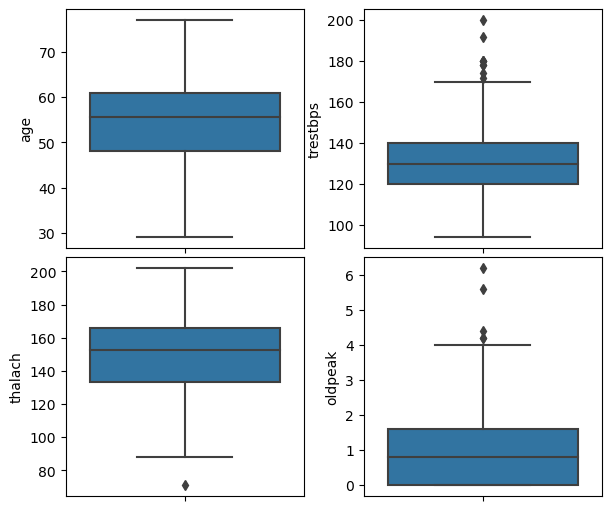

In [8]:
columns = ["age", "trestbps", "thalach", "oldpeak"]

fig, axes = plt.subplots(nrows=2, ncols = 2, figsize=(6, 5))

index  = 0
for col_no in range(0, 4, 2):
    sns.boxplot(data = df, y = columns[col_no], ax = axes[index][0])
    sns.boxplot(data = df, y = columns[col_no+1], ax = axes[index][1])
    index+= 1
plt.tight_layout(pad=0.3)
plt.show()

In [9]:
X = df.drop('target',axis=1)
Y = df['target']
X_cols=X.columns
y_cols="target"

Skewness for the column is: age -0.2037432795959691
Distribution is left skewed.
Skewness for the column is: trestbps 0.7165414326647318
Distribution is right skewed.
Skewness for the column is: thalach -0.5326712468229611
Distribution is left skewed.
Skewness for the column is: oldpeak 1.2661727209102187
Distribution is right skewed.


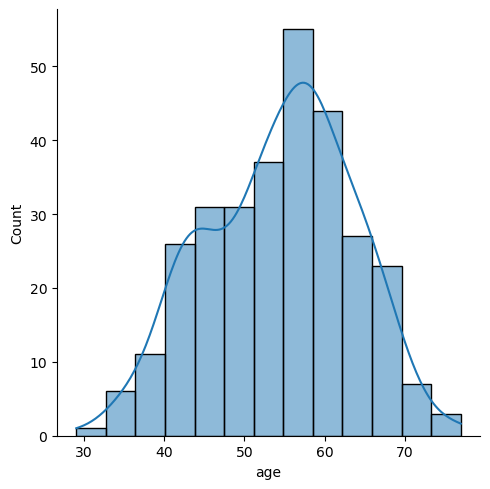

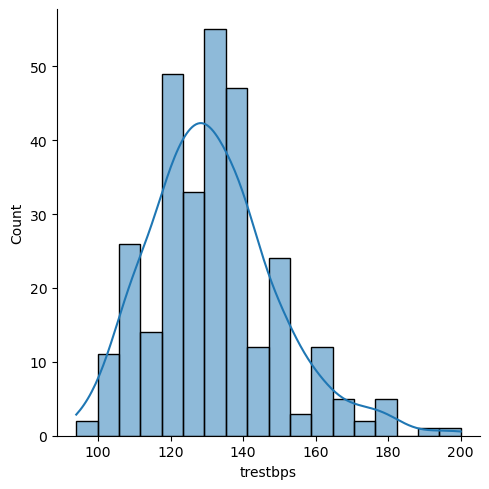

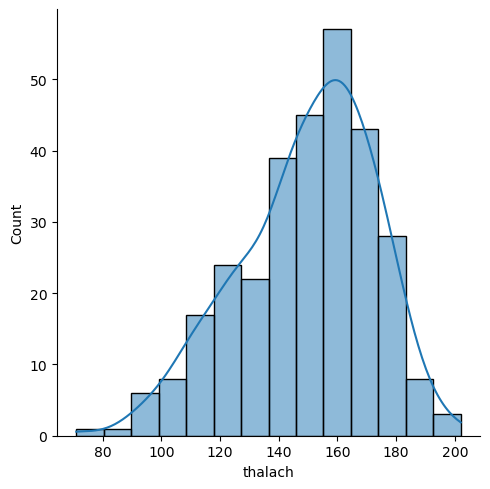

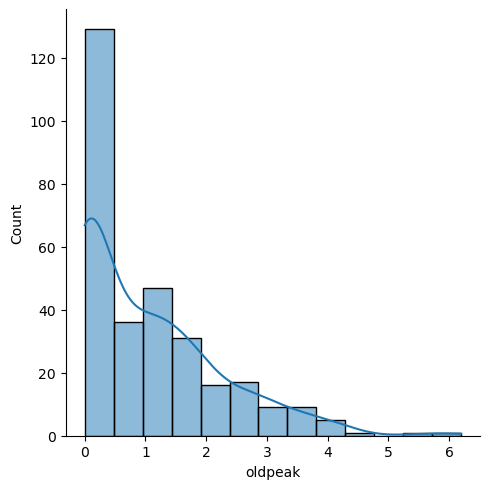

In [10]:
def check_distribution(df):
    for column in df.columns:
        print(f"Skewness for the column is: {column}", df[column].skew())
        if  df[column].skew()>0:
            print("Distribution is right skewed.")
        elif  df[column].skew()<0:
            print("Distribution is left skewed.")
        else:
            print("Normally distributed.")

        sns.displot(df[column], kde = True)
    plt.show()
    
columns = ["age", "trestbps", "thalach", "oldpeak"]

check_distribution(X[columns])

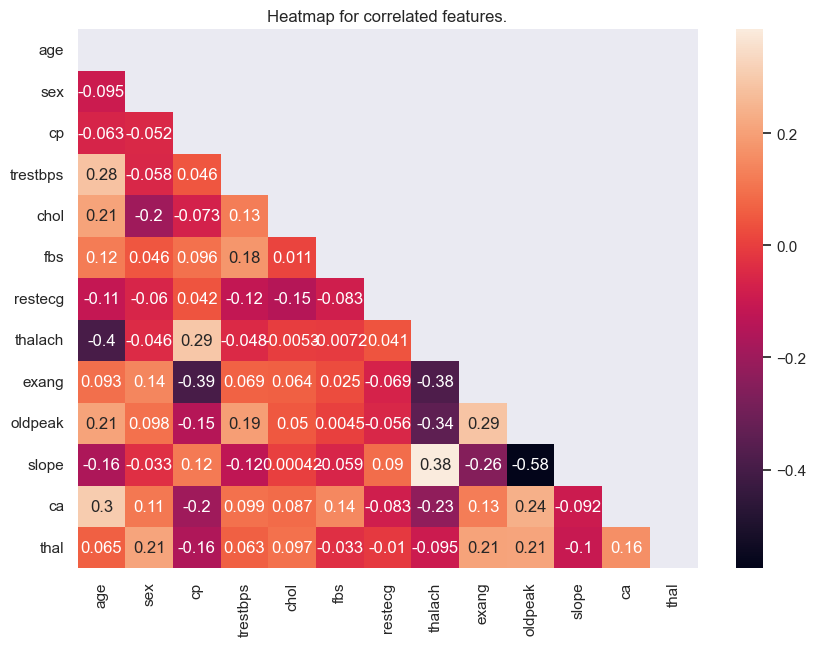

In [11]:
sns.set(rc={'figure.figsize':(10,7)});

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(X.corr())

# using the upper triangle matrix as mask 
sns.heatmap(X.corr(), annot=True, mask=matrix)
plt.title("Heatmap for correlated features.");


In [12]:
df.groupby(by='target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


## Without Dimensionality Reduction


In [13]:
pipeline = make_pipeline(
    KMeans(n_clusters=2, random_state=42)
)

# Fit the pipeline to the data
pipeline.fit(X)

# Get the labels and centroids
labels = pipeline.predict(X)
centroids = pipeline.named_steps['kmeans'].cluster_centers_

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### (Expectation Maximization 2 Cluster) vs (Kmeans 2  Cluster) vs for (booking_status vs Actual Stats)

In [14]:
df.groupby(by='target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


In [15]:
pd.DataFrame(centroids,columns=X_cols)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,53.140625,0.739583,1.046875,129.703125,216.473958,0.156250,0.572917,151.708333,0.286458,0.978646,1.406250,0.651042,2.260417
1,56.654545,0.581818,0.818182,134.918182,298.909091,0.136364,0.445455,145.836364,0.400000,1.155455,1.381818,0.836364,2.409091


In [16]:
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(X)

pd.DataFrame(gmm.means_,columns=X_cols)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.000000,0.733333,1.200000,139.066667,247.911111,1.0,0.422222,149.177778,0.355556,1.055556,1.311111,1.066667,2.266667
1,53.968872,0.673152,0.922179,130.295720,246.252918,0.0,0.544747,149.638132,0.322957,1.040856,1.412451,0.657588,2.322957


### Finding optimal Clusters using k-elbow method for k mean

In [17]:
sns.set_style("whitegrid")

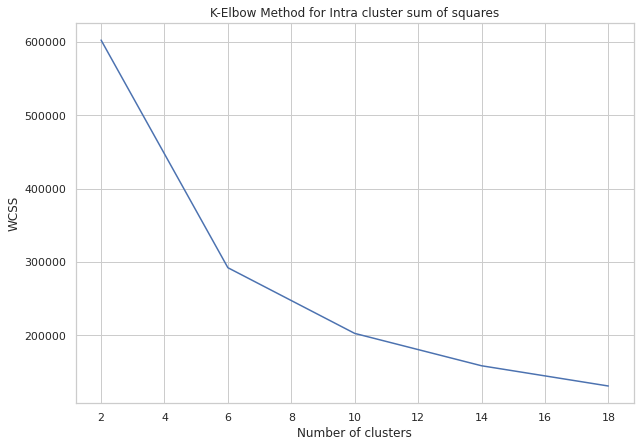

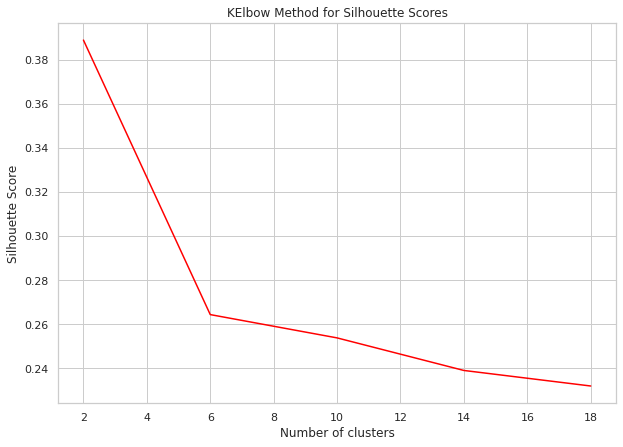

In [18]:

wcss = []
silhouette_scores = []

max_clusters = 25
for i in range(2, 20,4):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    cluster_labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Plot the Elbow Method graph
plt.plot(range(2, 20,4), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, 20,4), silhouette_scores, color='red')
plt.title('KElbow Method for Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


### Running K mean with optimal clusters

In [19]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)
cluster_labels = kmeans.fit_predict(X)

# Fit the kmeans to the data
kmeans.fit(X)

# Get the labels and centroids
labels = kmeans.predict(X)
cluster_labels = kmeans.predict(X)
score=silhouette_score(X, cluster_labels)
print("Running K mean with optimal clusters ")
print("Intra cluster sum of squares",kmeans.inertia_)
print("Silhouette score",score)

Running K mean with optimal clusters 
Intra cluster sum of squares 292213.1067524917
Silhouette score 0.26439708999633976


In [20]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids,columns=X_cols)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,59.816327,7.346939e-01,0.836735,137.408163,264.959184,0.183673,0.387755,124.448980,0.530612,1.387755,1.081633,0.959184,2.469388
1,47.823529,6.862745e-01,1.333333,127.745098,196.196078,0.176471,0.666667,168.862745,0.137255,0.598039,1.666667,0.333333,2.176471
2,62.600000,-1.110223e-16,0.800000,135.800000,438.200000,0.200000,0.000000,155.600000,0.200000,1.900000,1.200000,1.200000,2.600000
3,52.382022,7.191011e-01,1.112360,129.640449,242.606742,0.146067,0.528090,162.382022,0.235955,0.806742,1.483146,0.662921,2.303371
4,55.596491,5.789474e-01,0.842105,135.263158,310.070175,0.140351,0.526316,153.298246,0.368421,0.996491,1.526316,0.771930,2.333333
5,57.274510,7.450980e-01,0.607843,128.803922,196.019608,0.098039,0.568627,127.294118,0.450980,1.537255,1.156863,0.862745,2.274510


### Finding optimal Clusters using Expectation Maximization method for k mean

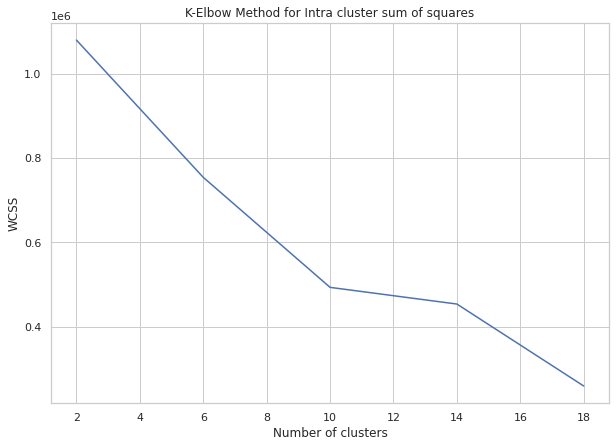

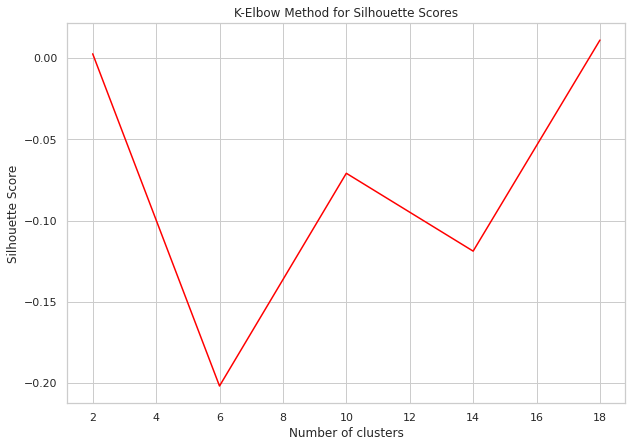

In [21]:

wcss = []
silhouette_scores = []
max_clusters = 10
for i in range(2, 20,4):
    gmm = GaussianMixture(n_components=i, covariance_type='full', random_state=0)
    gmm.fit(X)
    cluster_labels = gmm.predict(X)
    
    wcss_gmm = np.sum([np.sum((X[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(i)])
    wcss.append(wcss_gmm)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)


plt.plot(range(2, 20,4), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2, 20,4), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Running Expectation Maximization with optimal clusters

In [22]:
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=0)
gmm.fit(X)
cluster_labels = gmm.predict(X)
wcss_gmm = np.sum([np.sum((X[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(6)])
silhouette_avg = silhouette_score(X, cluster_labels)

print("Running Expectation Maximization with  optimal clusters ")
print("Intra cluster sum of squares",wcss_gmm)
print("Silhouette score",silhouette_avg)

Running Expectation Maximization with  optimal clusters 
Intra cluster sum of squares 104485.70601467276
Silhouette score -0.07093138078037302


In [23]:
centroids = gmm.means_
pd.DataFrame(centroids,columns=X_cols)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,53.407983,0.946858,1.133484,132.422235,214.199780,0.398937,0.570506,163.673833,0.292825,1.028875,1.475070,0.401897,2.520668
1,55.969561,0.772361,0.318491,128.972885,311.440021,0.091055,0.589797,145.453459,0.726788,1.239636,1.364170,1.088982,2.680912
2,55.333333,0.833333,0.333333,130.583333,171.250000,0.166667,0.583333,122.166666,0.500000,2.141667,0.916667,0.916667,2.500000
3,60.017829,0.825678,0.434167,133.038639,271.890942,0.130775,0.350546,114.626749,0.870913,1.595757,1.087178,1.393477,2.520810
4,62.200000,0.000000,0.800000,144.800000,397.400000,0.200000,0.000000,153.800000,0.200000,1.740000,1.400000,1.200000,2.400000
5,54.169820,0.721498,0.446061,128.963886,251.864019,0.397852,0.485701,153.347153,0.639937,0.784284,1.446042,1.113184,2.522592
6,56.209327,0.884583,0.835143,127.896578,217.749472,0.045843,0.446007,135.567885,0.529704,1.461655,1.136423,0.923363,2.400863
7,59.554647,0.555468,1.499701,164.888398,286.677832,0.555651,0.388965,149.331865,0.333399,1.333471,1.111133,0.722353,2.499918
8,51.373913,0.504348,1.278261,127.991304,241.504348,0.000000,0.617391,159.782609,0.000000,0.603478,1.626087,0.417391,2.000000
9,67.000000,0.000000,2.000000,115.000000,564.000000,0.000000,0.000000,160.000000,0.000000,1.600000,1.000000,0.000000,3.000000


## Dimensionality Reduction

### Distribution of eigenvalues

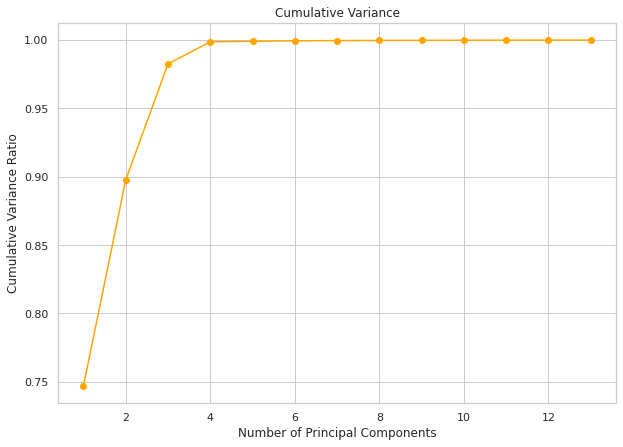

In [24]:

# Perform PCA on the data
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate the cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o',color='orange')
plt.title('Cumulative Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()


### Reconstruction Error for PCA

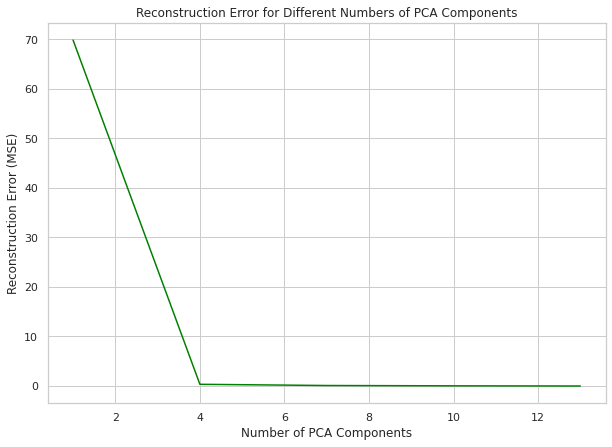

In [25]:


# Set the maximum number of PCA components
max_components = min(X.shape)

# Calculate reconstruction errors for different numbers of PCA components
reconstruction_errors = []
for n_components in range(1, max_components + 1,3):
    # Perform PCA with n_components
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Reconstruct the dataset using the reduced representation
    X_reconstructed = pca.inverse_transform(X_pca)
    
    # Calculate the reconstruction error (mean squared error)
    reconstruction_error = mean_squared_error(X, X_reconstructed)
    reconstruction_errors.append(reconstruction_error)

# Plot the reconstruction errors for different numbers of PCA components
plt.plot(range(1, max_components + 1,3), reconstruction_errors,color='green')
plt.title('Reconstruction Error for Different Numbers of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.show()


### PCA for k-Means with  Optimal Clusters

100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  2.74it/s]


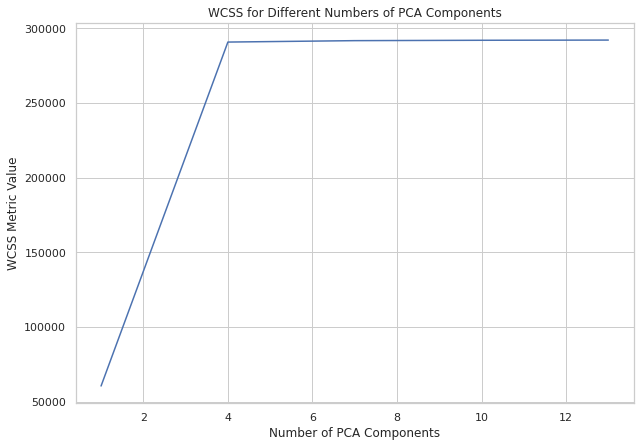

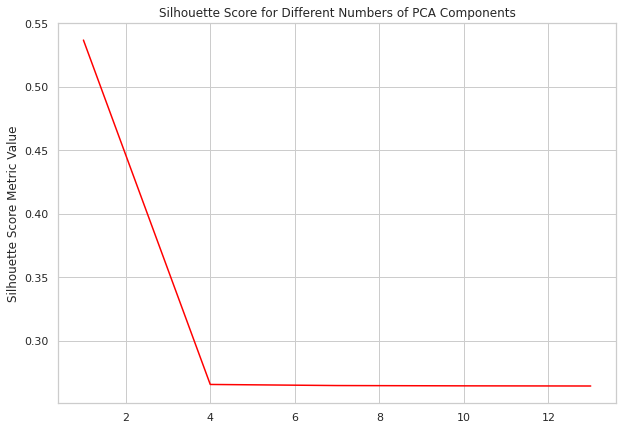

In [26]:

# Set the number of clusters for k-means
n_clusters = 6

# Calculate WCSS and silhouette scores for different numbers of PCA components
wcss = []
silhouette_scores = []
max_pca_components = min(X.shape)
for n_components in tqdm.tqdm(range(1, max_pca_components + 1,3)):
    # Perform PCA with n_components
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Perform k-means clustering on the reduced data
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    # Calculate WCSS and silhouette score
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS and silhouette scores for different numbers of PCA components
plt.plot(range(1, max_pca_components + 1,3), wcss, label='WCSS')
plt.xlabel('Number of PCA Components')
plt.ylabel('WCSS Metric Value')
plt.title('WCSS for Different Numbers of PCA Components')
plt.show()

plt.plot(range(1, max_pca_components + 1,3), silhouette_scores, label='Silhouette Score',color='red')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.ylabel('Silhouette Score Metric Value')
plt.show()



### PCA for k-Means with 2d Data

100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  3.38it/s]


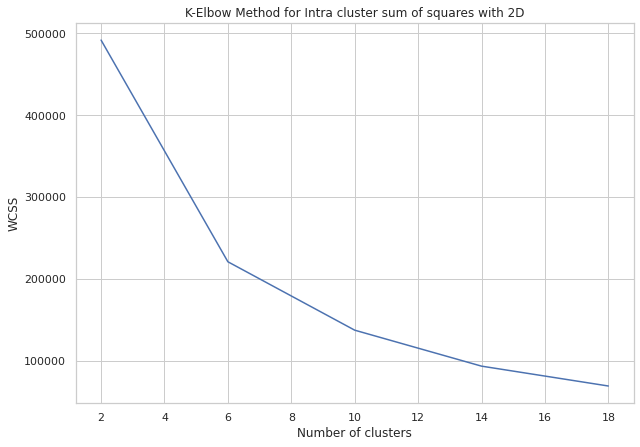

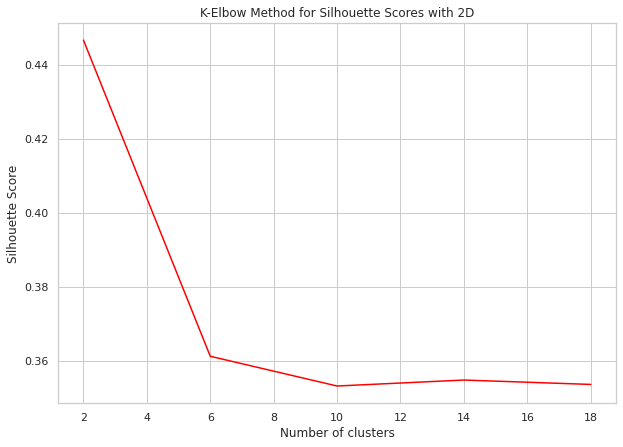

In [27]:

# Calculate WCSS and silhouette scores for different numbers of PCA components
wcss = []
silhouette_scores = []
max_pca_components = 15
for clusters in tqdm.tqdm(range(2, max_pca_components + 1,3)):
    # Perform PCA with n_components
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Perform k-means clustering on the reduced data
    kmeans = KMeans(n_clusters=clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    # Calculate WCSS and silhouette score
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method graph
plt.plot(range(2, 20,4), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, 20,4), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



### Optimal  PCA with 2 Components for k-Means with Optimal Clusters

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
# Fit the kmeans to the data
kmeans.fit(X_pca)

# Get the labels and centroids
labels = kmeans.predict(X_pca)
cluster_labels = kmeans.predict(X_pca)
score=silhouette_score(X_pca, cluster_labels)
print("Running K mean with  optimal clusters ")
print("Intra cluster sum of squares",kmeans.inertia_)
print("Silhouette score",score)

Running K mean with  optimal clusters 
Intra cluster sum of squares 182040.90467070646
Silhouette score 0.3637084598915357


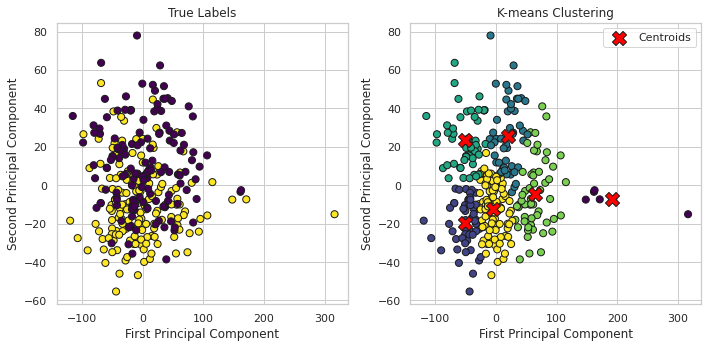

In [29]:

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform k-means clustering on the PCA-reduced data
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(X_pca)

# Visualize the PCA-reduced data and k-means clustering results
plt.figure(figsize=(10, 5))

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot the k-means clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', edgecolor='k', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.tight_layout()
plt.show()


### PCA for Expectation Maximization with   Optimal Clusters

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 12.16it/s]


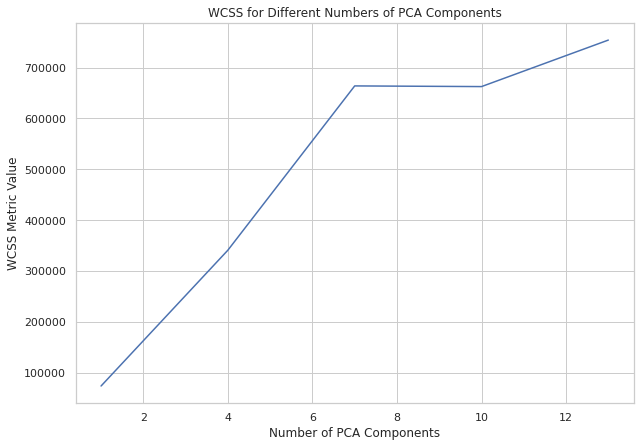

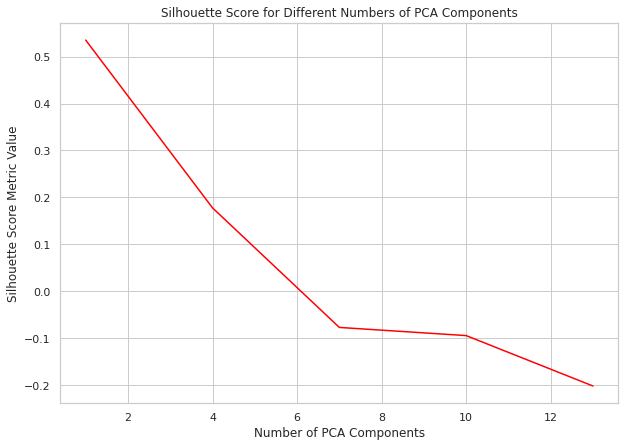

In [30]:

# Set the number of components (clusters) for GMM
n_components = 6

# Calculate WCSS and silhouette scores for different numbers of PCA components
wcss = []
silhouette_scores = []
max_pca_components = min(X.shape)
for n_pca_components in tqdm.tqdm(range(1, max_pca_components + 1,3)):
    # Perform PCA with n_pca_components
    pca = PCA(n_components=n_pca_components)
    X_pca = pca.fit_transform(X)
    
    # Perform Expectation Maximization clustering using GMM on the reduced data
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(X_pca)
    cluster_labels = gmm.predict(X_pca)
    
    # Calculate WCSS for GMM
    wcss_gmm = np.sum([np.sum((X_pca[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(n_components)])
    wcss.append(wcss_gmm)
    
    # Calculate silhouette score for GMM
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS and silhouette scores for different numbers of PCA components
plt.plot(range(1, max_pca_components + 1,3), wcss, label='WCSS')
plt.xlabel('Number of PCA Components')
plt.ylabel('WCSS Metric Value')
plt.title('WCSS for Different Numbers of PCA Components')
plt.show()

plt.plot(range(1, max_pca_components + 1,3), silhouette_scores, label='Silhouette Score',color='red')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.xlabel('Number of PCA Components')

plt.ylabel('Silhouette Score Metric Value')
plt.show()

### PCA for Expectation Maximization 2d Data

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 16.13it/s]


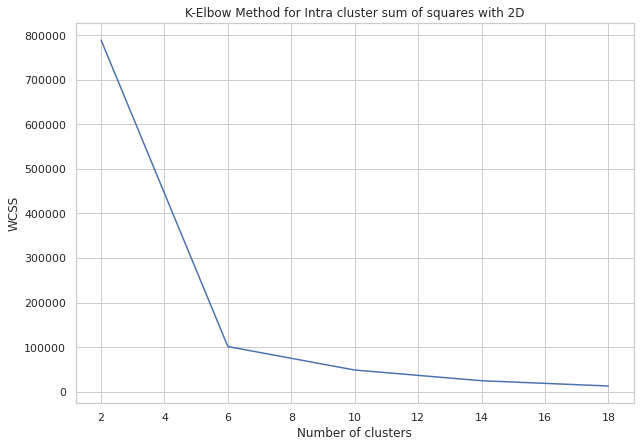

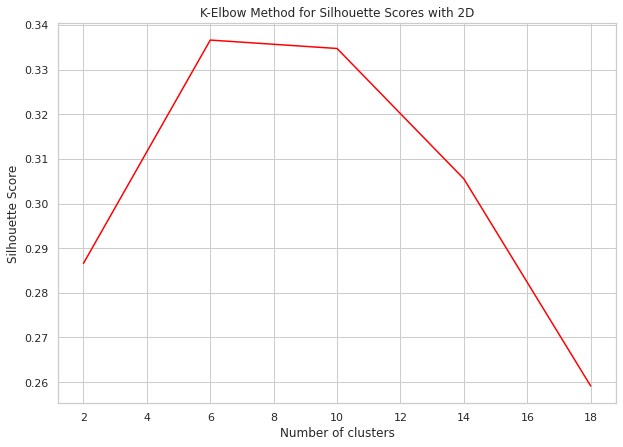

In [31]:

# Calculate WCSS and silhouette scores for different numbers of PCA components
wcss = []
silhouette_scores = []
total_cluster = 15
for cluster in tqdm.tqdm(range(2, total_cluster + 1,3)):
    # Perform PCA with n_pca_components
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Perform Expectation Maximization clustering using GMM on the reduced data
    gmm = GaussianMixture(n_components=cluster, covariance_type='full', random_state=0)
    gmm.fit(X_pca)
    cluster_labels = gmm.predict(X_pca)
    
    # Calculate WCSS for GMM
    wcss_gmm = np.sum([np.sum((X_pca[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(2)])
    wcss.append(wcss_gmm)
    
    # Calculate silhouette score for GMM
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method graph
plt.plot(range(2, 20,4), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, 20,4), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



### Optimal  Expectation Maximization  with 2 Components for k-Means with  Optimal Clusters

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=0)
gmm.fit(X_pca)
cluster_labels = gmm.predict(X_pca)
wcss_gmm = np.sum([np.sum((X_pca[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(2)])
silhouette_avg = silhouette_score(X_pca, cluster_labels)

print("Running Expectation Maximization with  optimal clusters ")
print("Intra cluster sum of squares",wcss_gmm)
print("Silhouette score",silhouette_avg)

Running Expectation Maximization with  optimal clusters 
Intra cluster sum of squares 117698.34203238996
Silhouette score 0.2930993900410153


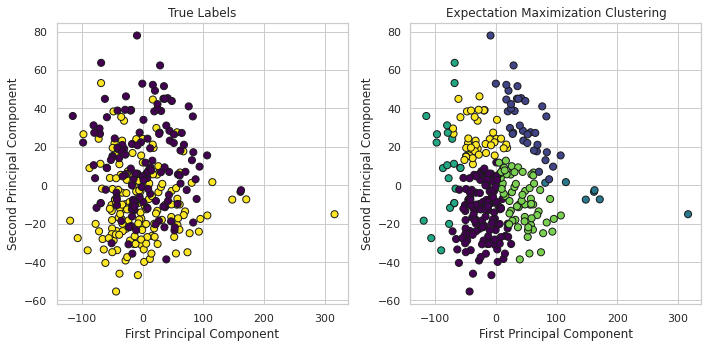

In [33]:

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform Expectation Maximization clustering using GMM on the PCA-reduced data
n_components = 6
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
gmm_labels = gmm.fit_predict(X_pca)

# Visualize the PCA-reduced data and Expectation Maximization clustering results
plt.figure(figsize=(10, 5))

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot the Expectation Maximization clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Expectation Maximization Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.tight_layout()
plt.show()


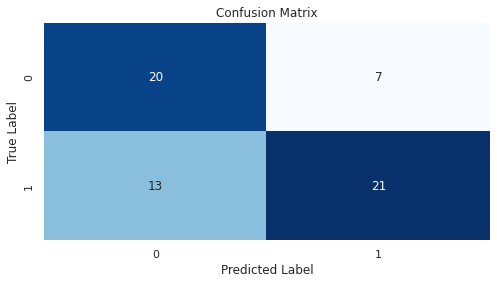

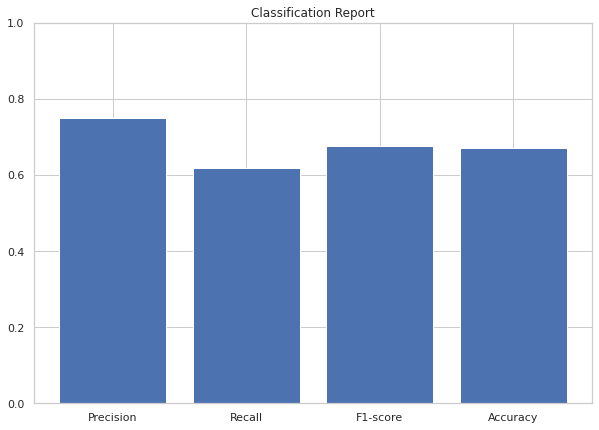

In [34]:

# Apply PCA with 2 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)

# Instantiate a simple feed-forward neural network
clf = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=0)

# Train the neural network on the training set
clf.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = clf.predict(X_test)

# Compute classification metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
metrics = [precision, recall, f1, accuracy]

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the classification report
labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
plt.bar(labels, metrics)
plt.title('Classification Report')
plt.ylim(0, 1)
plt.show()


# ICA


### MSE between the original dataset & the reconstructed dataset

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy

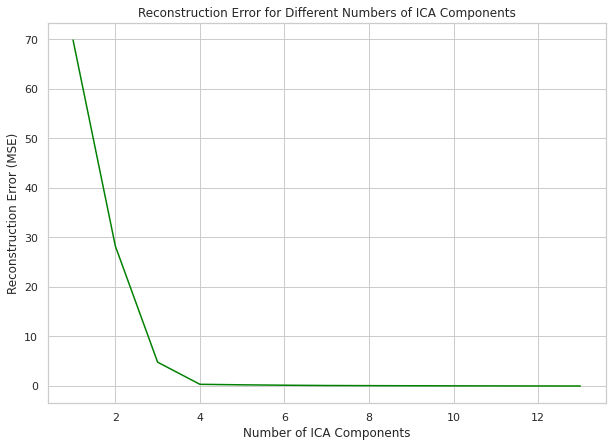

In [35]:

# Calculate reconstruction errors for different numbers of ICA components
reconstruction_errors = []
for n_components in range(1, max_components + 1):
    # Perform ICA with n_components
    ica = FastICA(n_components=n_components, random_state=0)
    X_ica = ica.fit_transform(X)
    
    # Reconstruct the dataset using the independent components
    X_reconstructed = ica.inverse_transform(X_ica)
    
    # Calculate the reconstruction error (mean squared error)
    reconstruction_error = mean_squared_error(X, X_reconstructed)
    reconstruction_errors.append(reconstruction_error)

# Plot the reconstruction errors for different numbers of ICA components
plt.plot(range(1, max_components + 1), reconstruction_errors,color='green')
plt.title('Reconstruction Error for Different Numbers of ICA Components')
plt.xlabel('Number of ICA Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.show()


### ICA for k-means with  Optimal Clusters

  0%|                                                     | 0/5 [00:00<?, ?it/s]/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
 20%|█████████                                    | 1/5 [00:00<00:00,  4.95it/s]/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
 40%|██████████████████                           | 2/5 [00:00<00:00,  4.57it/s]/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
 60%|███████████████████████████                  | 3/5 [00:00<00:00,  4.43it/s]/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py

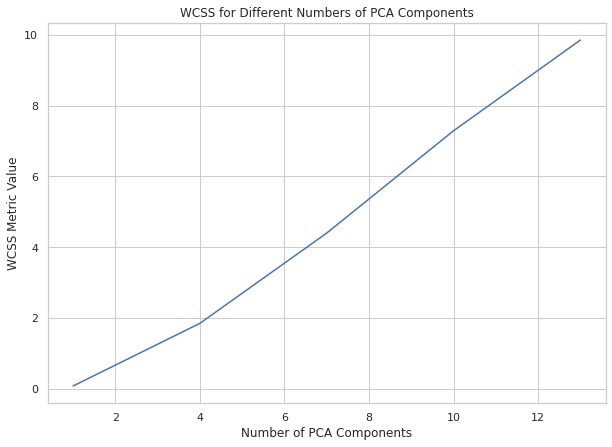

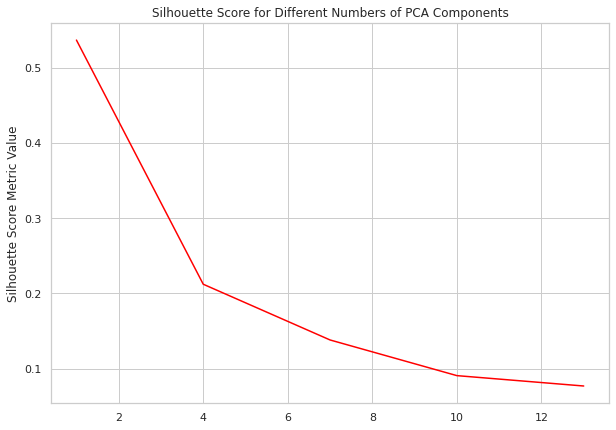

In [36]:

# Set the number of clusters for k-means
n_clusters = 6
# Calculate WCSS and silhouette scores for different numbers of ICA components
wcss = []
silhouette_scores = []
max_ica_components = min(X.shape)
for n_components in tqdm.tqdm(range(1, max_pca_components + 1,3)):
    # Perform ICA with n_components
    ica = FastICA(n_components=n_components, random_state=0)
    X_ica = ica.fit_transform(X)
    
    # Perform k-means clustering on the transformed data
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_ica)
    
    # Calculate WCSS and silhouette score
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_ica, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS and silhouette scores for different numbers of ICA components
plt.plot(range(1, max_pca_components + 1,3), wcss, label='WCSS')
plt.xlabel('Number of PCA Components')
plt.ylabel('WCSS Metric Value')
plt.title('WCSS for Different Numbers of PCA Components')
plt.show()

plt.plot(range(1, max_pca_components + 1,3), silhouette_scores, label='Silhouette Score',color='red')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.ylabel('Silhouette Score Metric Value')
plt.show()

### ICA for k-means with 2d Data

  0%|                                                     | 0/5 [00:00<?, ?it/s]/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
 20%|█████████                                    | 1/5 [00:00<00:01,  3.81it/s]/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
 40%|██████████████████                           | 2/5 [00:00<00:00,  3.77it/s]/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
 60%|███████████████████████████                  | 3/5 [00:00<00:00,  3.68it/s]/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py

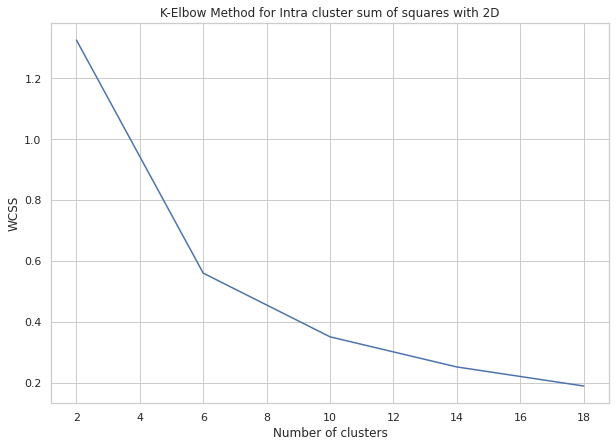

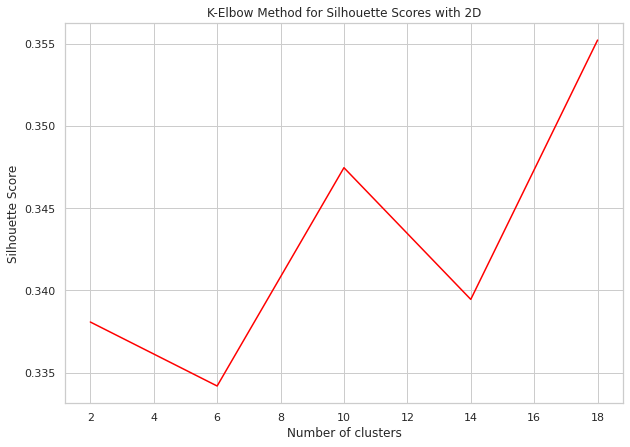

In [37]:

# Calculate WCSS and silhouette scores for different numbers of ICA components
wcss = []
silhouette_scores = []
n_clusterss = 15
for n_clusters in tqdm.tqdm(range(2, n_clusterss + 1,3)):
    # Perform ICA with n_components
    ica = FastICA(n_components=2, random_state=0)
    X_ica = ica.fit_transform(X)
    
    # Perform k-means clustering on the transformed data
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_ica)
    
    # Calculate WCSS and silhouette score
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_ica, cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Plot the Elbow Method graph
plt.plot(range(2, 20,4), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, 20,4), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### ICA in 2d

In [38]:
ica = FastICA(n_components=2, random_state=0)
X_ica = ica.fit_transform(X)


kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
# Fit the kmeans to the data
kmeans.fit(X_ica)

# Get the labels and centroids
labels = kmeans.predict(X_ica)
cluster_labels = kmeans.predict(X_ica)
score=silhouette_score(X_ica, cluster_labels)
print("Running K mean with   optimal clusters ")
print("Intra cluster sum of squares",kmeans.inertia_)
print("Silhouette score",score)

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Running K mean with   optimal clusters 
Intra cluster sum of squares 0.46731095032151343
Silhouette score 0.3442938567619162


/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


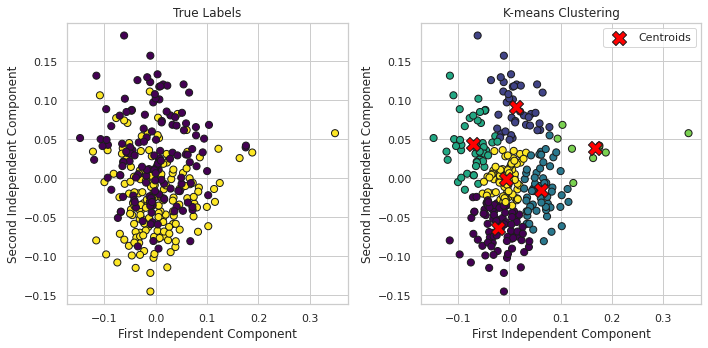

In [39]:

# Apply ICA with 2 components
ica = FastICA(n_components=2, random_state=0)
X_ica = ica.fit_transform(X)

# Perform k-means clustering on the ICA-transformed data
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(X_ica)

# Visualize the ICA-transformed data and k-means clustering results
plt.figure(figsize=(10, 5))

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

# Plot the k-means clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', edgecolor='k', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')
plt.legend()

plt.tight_layout()
plt.show()


### ICA for Expectation Maximization with  Optimal Clusters

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


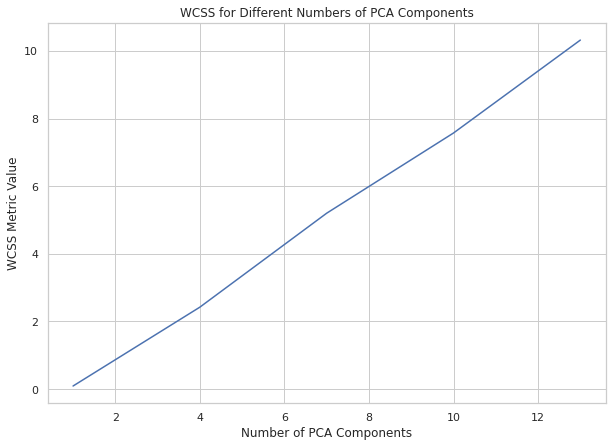

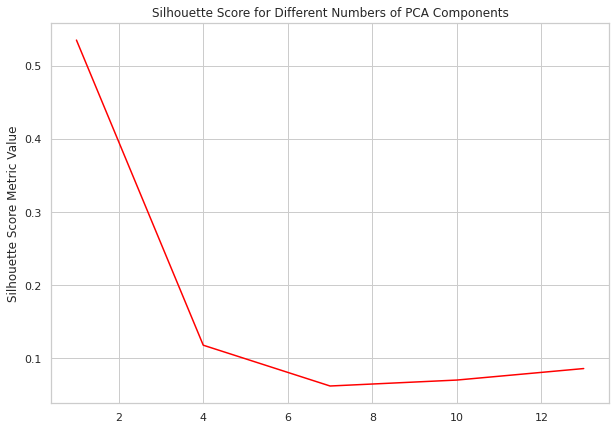

In [40]:

# Set the number of components (clusters) for GMM
n_components = 6

# Calculate WCSS and silhouette scores for different numbers of ICA components
wcss = []
silhouette_scores = []
max_ica_components = min(X.shape)
for n_ica_components in range(1, max_pca_components + 1,3):
    # Perform ICA with n_ica_components
    ica = FastICA(n_components=n_ica_components, random_state=0)
    X_ica = ica.fit_transform(X)
    
    # Perform Expectation Maximization clustering using GMM on the transformed data
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(X_ica)
    cluster_labels = gmm.predict(X_ica)
    
    # Calculate WCSS for GMM
    wcss_gmm = np.sum([np.sum((X_ica[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(n_components)])
    wcss.append(wcss_gmm)
    
    # Calculate silhouette score for GMM
    silhouette_avg = silhouette_score(X_ica, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS and silhouette scores for different numbers of ICA components
plt.plot(range(1, max_pca_components + 1,3), wcss, label='WCSS')
plt.xlabel('Number of PCA Components')
plt.ylabel('WCSS Metric Value')
plt.title('WCSS for Different Numbers of PCA Components')
plt.show()

plt.plot(range(1, max_pca_components + 1,3), silhouette_scores, label='Silhouette Score',color='red')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.ylabel('Silhouette Score Metric Value')
plt.show()

### ICA for Expectation Maximization with 2d Data

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


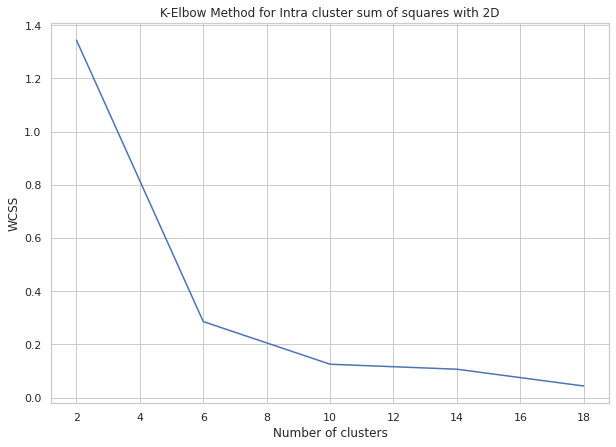

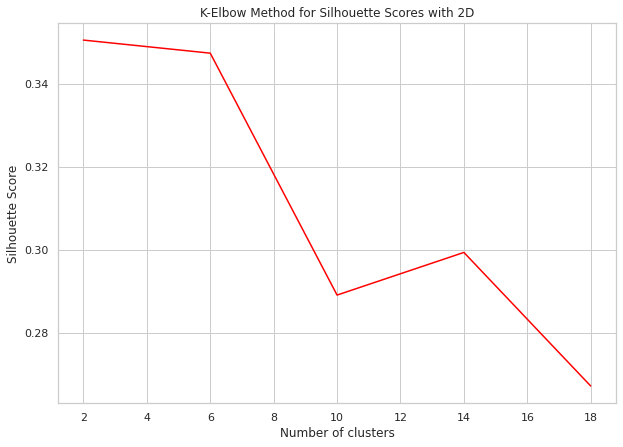

In [41]:

# Set the number of components (clusters) for GMM
n_components = 6

# Calculate WCSS and silhouette scores for different numbers of ICA components
wcss = []
silhouette_scores = []
nclusters = 15
for clusters in range(2, nclusters + 1,3):
    # Perform ICA with n_ica_components
    ica = FastICA(n_components=2, random_state=0)
    X_ica = ica.fit_transform(X)
    
    # Perform Expectation Maximization clustering using GMM on the transformed data
    gmm = GaussianMixture(n_components=clusters, covariance_type='full', random_state=0)
    gmm.fit(X_ica)
    cluster_labels = gmm.predict(X_ica)
    
    # Calculate WCSS for GMM
    wcss_gmm = np.sum([np.sum((X_ica[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(2)])
    wcss.append(wcss_gmm)
    
    # Calculate silhouette score for GMM
    silhouette_avg = silhouette_score(X_ica, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method graph
plt.plot(range(2, 20,4), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, 20,4), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### ICA in 2d data

In [42]:
ica = FastICA(n_components=2, random_state=0)
X_ica = ica.fit_transform(X)
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=0)
gmm.fit(X_ica)
cluster_labels = gmm.predict(X_ica)
wcss_gmm = np.sum([np.sum((X_ica[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(2)])
silhouette_avg = silhouette_score(X_ica, cluster_labels)

print("Running Expectation Maximization with  optimal clusters ")
print("Intra cluster sum of squares",wcss_gmm)
print("Silhouette score",silhouette_avg)

Running Expectation Maximization with  optimal clusters 
Intra cluster sum of squares 0.2409795910525946
Silhouette score 0.3120657593234685


/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


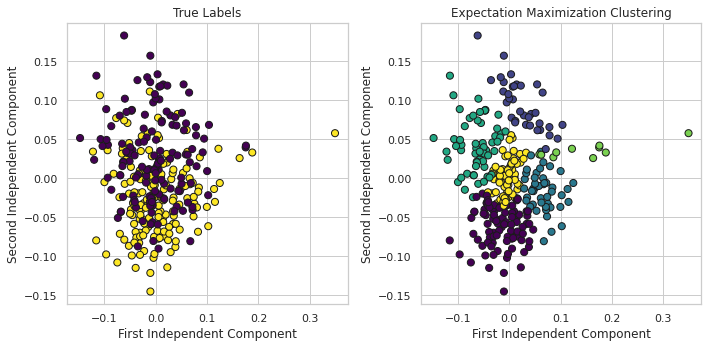

In [43]:

# Apply ICA with 2 components
ica = FastICA(n_components=2, random_state=0)
X_ica = ica.fit_transform(X)

# Perform Expectation Maximization clustering using GMM on the ICA-transformed data
n_components = 6
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
gmm_labels = gmm.fit_predict(X_ica)

# Visualize the ICA-transformed data and Expectation Maximization clustering results
plt.figure(figsize=(10, 5))

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

# Plot the Expectation Maximization clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Expectation Maximization Clustering')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

plt.tight_layout()
plt.show()


/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


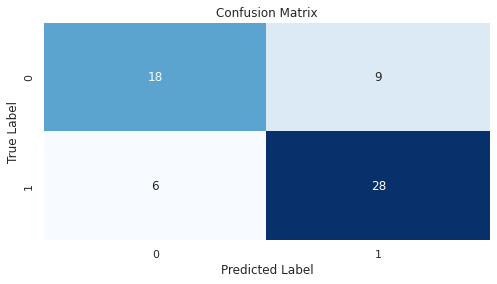

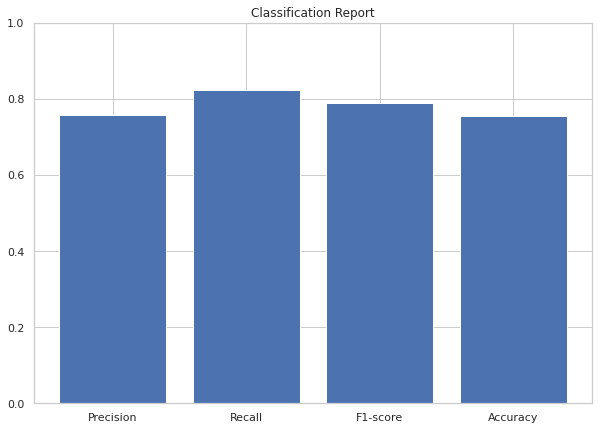

In [44]:

# Apply PCA with 2 components
ica = FastICA(n_components=2, random_state=0)
X_ica = ica.fit_transform(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ica, Y, test_size=0.2, random_state=0)

# Instantiate a simple feed-forward neural network
clf = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=0)

# Train the neural network on the training set
clf.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = clf.predict(X_test)

# Compute classification metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
metrics = [precision, recall, f1, accuracy]

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the classification report
labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
plt.bar(labels, metrics)
plt.title('Classification Report')
plt.ylim(0, 1)
plt.show()


# GaussianRandomProjection

### Reconstruction Error for GaussianRandomProjection

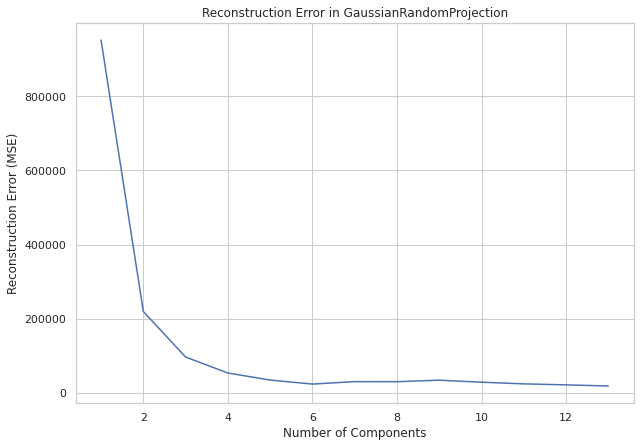

In [45]:

# Set the maximum number of components for GaussianRandomProjection
max_components = min(X.shape)

# Calculate reconstruction errors for different numbers of components
reconstruction_errors = []
for n_components in range(1, max_components + 1):
    # Perform GaussianRandomProjection with n_components
    grp = GaussianRandomProjection(n_components=n_components, random_state=0)
    X_grp = grp.fit_transform(X)
    
    # Reconstruct the dataset using the random components
    X_reconstructed = np.dot(X_grp, grp.components_) + np.mean(np.array(X), axis=0)
    
    # Calculate the reconstruction error (mean squared error)
    reconstruction_error = mean_squared_error(X, X_reconstructed)
    reconstruction_errors.append(reconstruction_error)

# Plot the reconstruction errors for different numbers of components
plt.plot(range(1, max_components + 1), reconstruction_errors)
plt.title('Reconstruction Error in GaussianRandomProjection')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.show()


### Randomized Projections for k-Mean with  Optimal Clusters

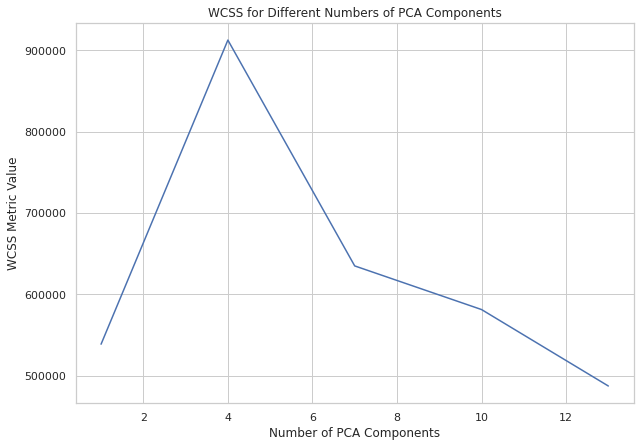

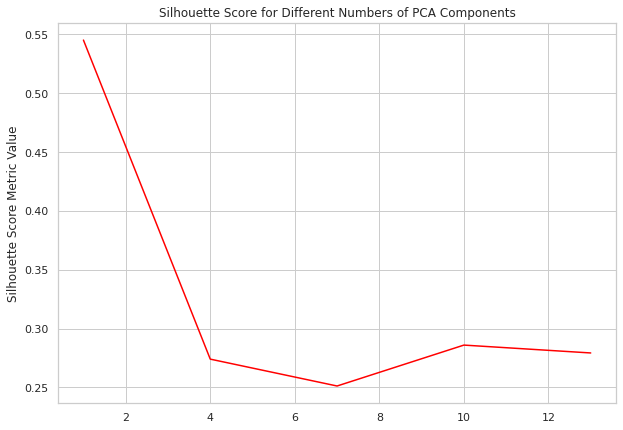

In [46]:


# Set the number of clusters for k-means
n_clusters = 4

# Calculate WCSS and silhouette scores for different numbers of JL components
wcss = []
silhouette_scores = []
max_jl_components = min(X.shape)
for n_components in range(1, max_pca_components + 1,3):
    # Perform JL transformation with n_components
    rp = GaussianRandomProjection(n_components=n_components, random_state=0)
    X_rp = rp.fit_transform(X)
    
    # Perform k-means clustering on the reduced data
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_rp)
    
    # Calculate WCSS and silhouette score
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_rp, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS and silhouette scores for different numbers of ICA components
plt.plot(range(1, max_pca_components + 1,3), wcss, label='WCSS')
plt.xlabel('Number of PCA Components')
plt.ylabel('WCSS Metric Value')
plt.title('WCSS for Different Numbers of PCA Components')
plt.show()

plt.plot(range(1, max_pca_components + 1,3), silhouette_scores, label='Silhouette Score',color='red')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.ylabel('Silhouette Score Metric Value')
plt.show()

### Randomized Projections  for k-means clustering with 2d Data

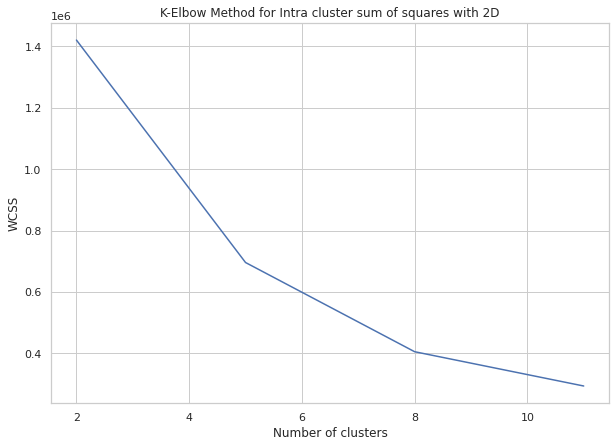

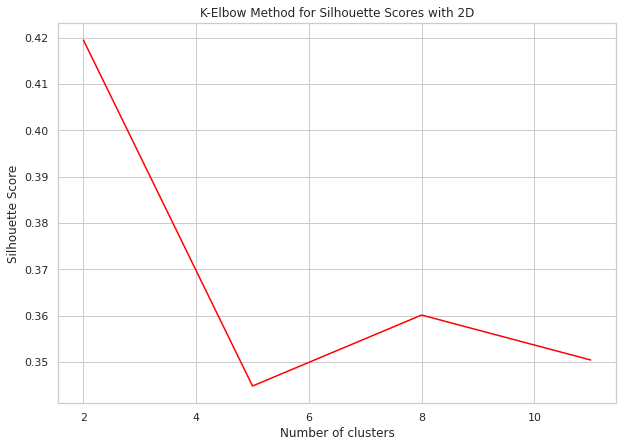

In [47]:


# Set the number of clusters for k-means
n_clusters = 4

# Calculate WCSS and silhouette scores for different numbers of JL components
wcss = []
silhouette_scores = []
clusters = min(X.shape)
for clusters_ in range(2, clusters + 1,3):
    # Perform JL transformation with n_components
    rp = GaussianRandomProjection(n_components=2, random_state=0)
    X_rp = rp.fit_transform(X)
    
    # Perform k-means clustering on the reduced data
    kmeans = KMeans(n_clusters=clusters_, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_rp)
    
    # Calculate WCSS and silhouette score
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_rp, cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Plot the Elbow Method graph
plt.plot(range(2, clusters + 1,3), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, clusters + 1,3), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

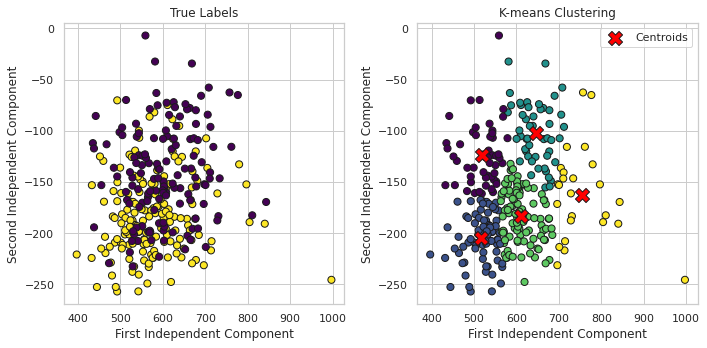

In [48]:
rp = GaussianRandomProjection(n_components=2, random_state=0)
X_rp = rp.fit_transform(X)
    
    # Perform k-means clustering on the reduced data
kmeans = KMeans(n_clusters=clusters_, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_rp)

# Perform k-means clustering on the ICA-transformed data
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(X_rp)

# Visualize the ICA-transformed data and k-means clustering results
plt.figure(figsize=(10, 5))

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X_rp[:, 0], X_rp[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

# Plot the k-means clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_rp[:, 0], X_rp[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', edgecolor='k', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')
plt.legend()

plt.tight_layout()
plt.show()


### Randomized Projections for Expectation Maximization with Optimal Clusters

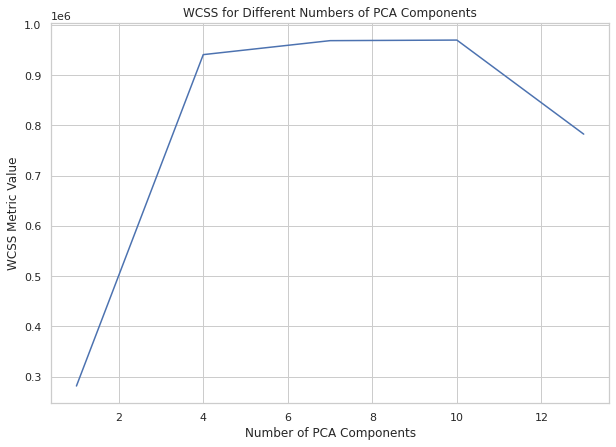

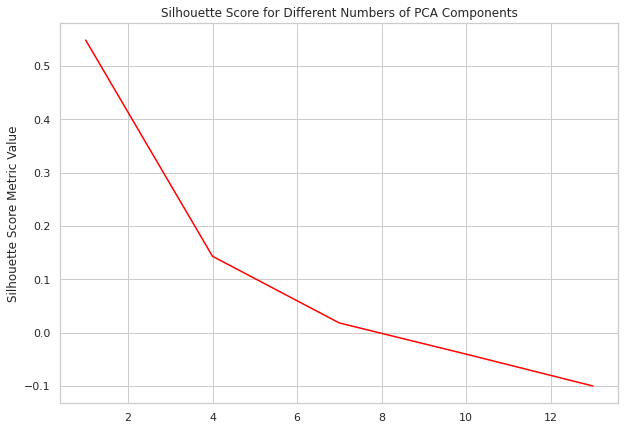

In [49]:


# Set the number of components (clusters) for GMM
n_components = 6

# Calculate WCSS and silhouette scores for different numbers of GRP components
wcss = []
silhouette_scores = []
max_grp_components = min(X.shape)
for n_grp_components in range(1, max_pca_components + 1,3):
    # Perform GRP with n_grp_components
    grp = GaussianRandomProjection(n_components=n_grp_components, random_state=0)
    X_grp = grp.fit_transform(X)
    
    # Perform Expectation Maximization clustering using GMM on the reduced data
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(X_grp)
    cluster_labels = gmm.predict(X_grp)
    
    # Calculate WCSS for GMM
    wcss_gmm = np.sum([np.sum((X_grp[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(n_components)])
    wcss.append(wcss_gmm)
    
    # Calculate silhouette score for GMM
    silhouette_avg = silhouette_score(X_grp, cluster_labels)
    silhouette_scores.append(silhouette_avg)


# Plot WCSS and silhouette scores for different numbers of ICA components
plt.plot(range(1, max_pca_components + 1,3), wcss, label='WCSS')
plt.xlabel('Number of PCA Components')
plt.ylabel('WCSS Metric Value')
plt.title('WCSS for Different Numbers of PCA Components')
plt.show()

plt.plot(range(1, max_pca_components + 1,3), silhouette_scores, label='Silhouette Score',color='red')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.ylabel('Silhouette Score Metric Value')
plt.show()

### Randomized Projections for Expectation Maximization clustering with 2d Data

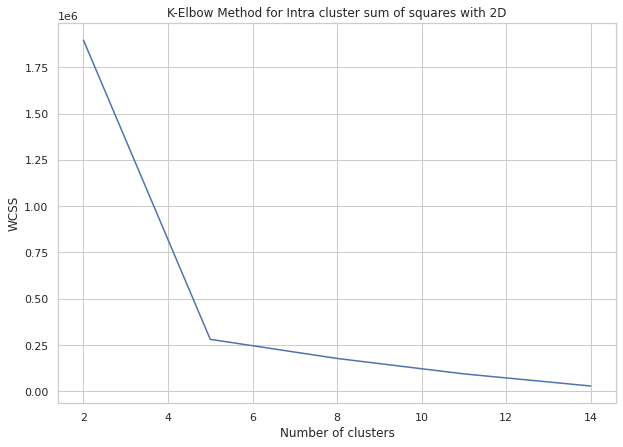

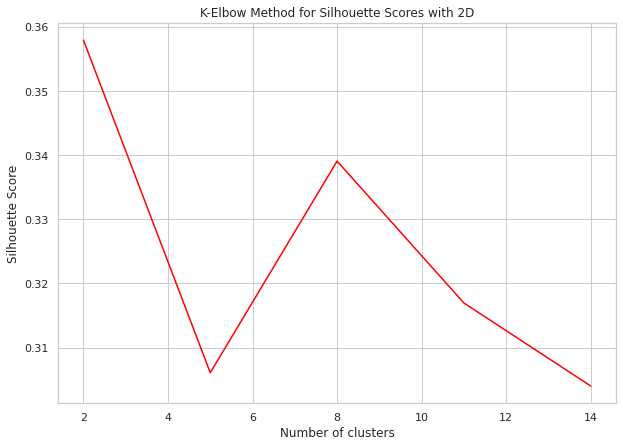

In [50]:


# Set the number of components (clusters) for GMM
n_components = 2

# Calculate WCSS and silhouette scores for different numbers of GRP components
wcss = []
silhouette_scores = []
clusters = 15
for cluster in range(2, clusters + 1,3):
    # Perform GRP with n_grp_components
    grp = GaussianRandomProjection(n_components=2, random_state=0)
    X_grp = grp.fit_transform(X)
    
    # Perform Expectation Maximization clustering using GMM on the reduced data
    gmm = GaussianMixture(n_components=cluster, covariance_type='full', random_state=0)
    gmm.fit(X_grp)
    cluster_labels = gmm.predict(X_grp)
    
    # Calculate WCSS for GMM
    wcss_gmm = np.sum([np.sum((X_grp[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(2)])
    wcss.append(wcss_gmm)
    
    # Calculate silhouette score for GMM
    silhouette_avg = silhouette_score(X_grp, cluster_labels)
    silhouette_scores.append(silhouette_avg)


# Plot the Elbow Method graph
plt.plot(range(2, clusters + 1,3), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, clusters + 1,3), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

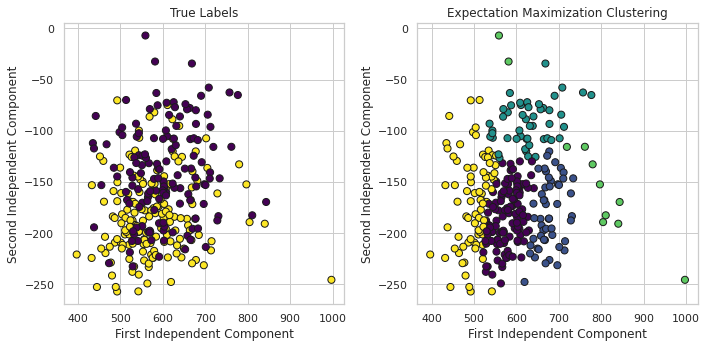

In [51]:
rp = GaussianRandomProjection(n_components=2, random_state=0)
X_rp = rp.fit_transform(X)
    
# Perform Expectation Maximization clustering using GMM on the ICA-transformed data
n_components = 5
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
gmm_labels = gmm.fit_predict(X_rp)

# Visualize the ICA-transformed data and Expectation Maximization clustering results
plt.figure(figsize=(10, 5))

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X_rp[:, 0], X_rp[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

# Plot the Expectation Maximization clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_rp[:, 0], X_rp[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Expectation Maximization Clustering')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

plt.tight_layout()
plt.show()


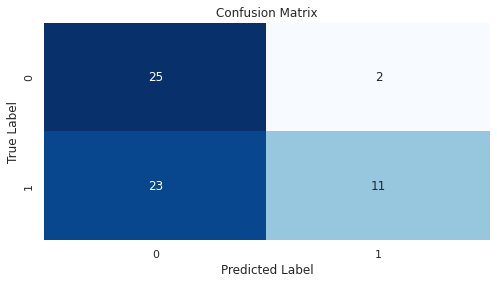

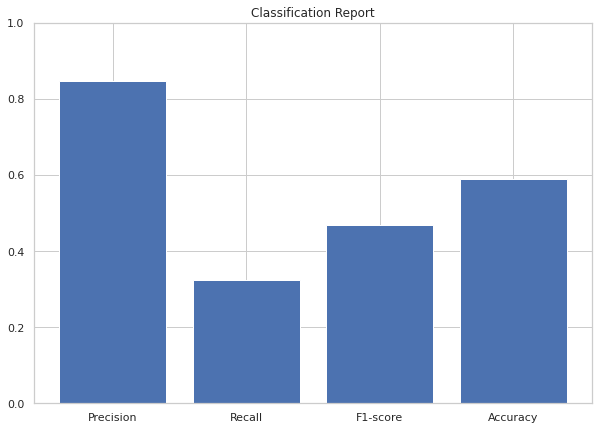

In [52]:
rp = GaussianRandomProjection(n_components=2, random_state=0)
X_rp = rp.fit_transform(X)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rp, Y, test_size=0.2, random_state=0)

# Instantiate a simple feed-forward neural network
clf = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=0)

# Train the neural network on the training set
clf.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = clf.predict(X_test)

# Compute classification metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
metrics = [precision, recall, f1, accuracy]

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the classification report
labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
plt.bar(labels, metrics)
plt.title('Classification Report')
plt.ylim(0, 1)
plt.show()


## Feature Selection

### Feature Selection for K-Mean  with Optimal Clusters

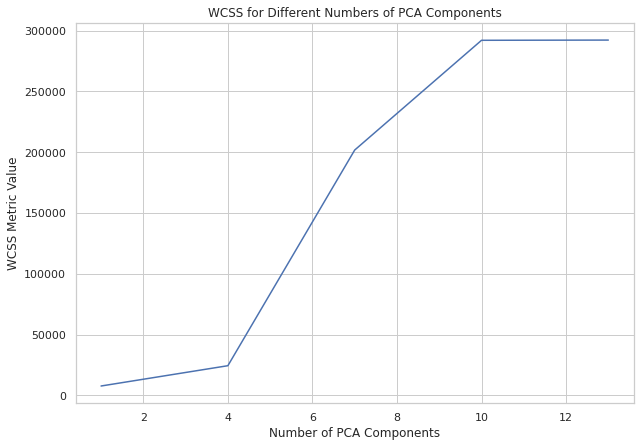

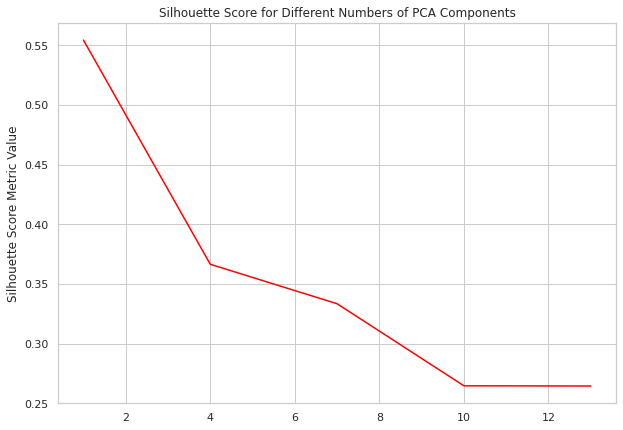

In [53]:

# Set the number of clusters for k-means
n_clusters = 6

# Calculate WCSS and silhouette scores for different numbers of selected features
wcss = []
silhouette_scores = []
max_features = X.shape[1]
for n_features in range(1, max_pca_components + 1,3):
    # Perform feature selection with n_features
    estimator = RandomForestClassifier(n_estimators=100, random_state=0)
    rfe = RFE(estimator, n_features_to_select=n_features)
    X_rfe = rfe.fit_transform(X, Y)
    
    # Perform k-means clustering on the reduced data
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_rfe)
    
    # Calculate WCSS and silhouette score
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_rfe, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS and silhouette scores for different numbers of ICA components
plt.plot(range(1, max_pca_components + 1,3), wcss, label='WCSS')
plt.xlabel('Number of PCA Components')
plt.ylabel('WCSS Metric Value')
plt.title('WCSS for Different Numbers of PCA Components')
plt.show()

plt.plot(range(1, max_pca_components + 1,3), silhouette_scores, label='Silhouette Score',color='red')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.ylabel('Silhouette Score Metric Value')
plt.show()


### Feature Selection for K-Mean  with 2d Data

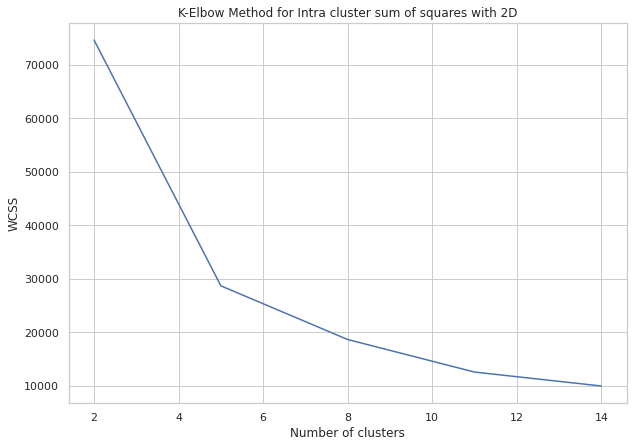

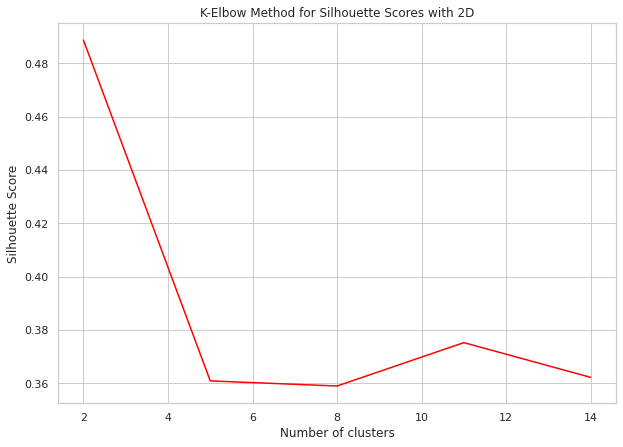

In [54]:

# Set the number of clusters for k-means
n_clusters = 6

# Calculate WCSS and silhouette scores for different numbers of selected features
wcss = []
silhouette_scores = []
nclusters = 15
for ncluster in range(2, nclusters + 1,3):
    # Perform feature selection with n_features
    estimator = RandomForestClassifier(n_estimators=100, random_state=0)
    rfe = RFE(estimator, n_features_to_select=2)
    X_rfe = rfe.fit_transform(X, Y)
    
    # Perform k-means clustering on the reduced data
    kmeans = KMeans(n_clusters=ncluster, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_rfe)
    
    # Calculate WCSS and silhouette score
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_rfe, cluster_labels)
    silhouette_scores.append(silhouette_avg)


# Plot the Elbow Method graph
plt.plot(range(2, nclusters + 1,3), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, nclusters + 1,3), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

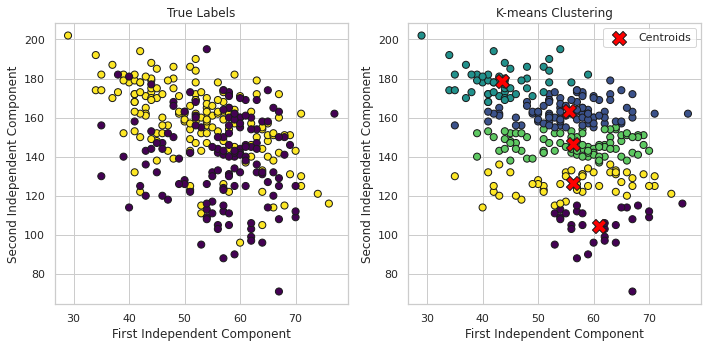

In [55]:
estimator = RandomForestClassifier(n_estimators=100, random_state=0)
rfe = RFE(estimator, n_features_to_select=2)
X_rfe = rfe.fit_transform(X, Y)
    

# Perform k-means clustering on the ICA-transformed data
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(X_rfe)

# Visualize the ICA-transformed data and k-means clustering results
plt.figure(figsize=(10, 5))

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X_rfe[:, 0], X_rfe[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

# Plot the k-means clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_rfe[:, 0], X_rfe[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', edgecolor='k', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')
plt.legend()

plt.tight_layout()
plt.show()


### Feature Selection for Expectation Maximization  with Optimal Clusters

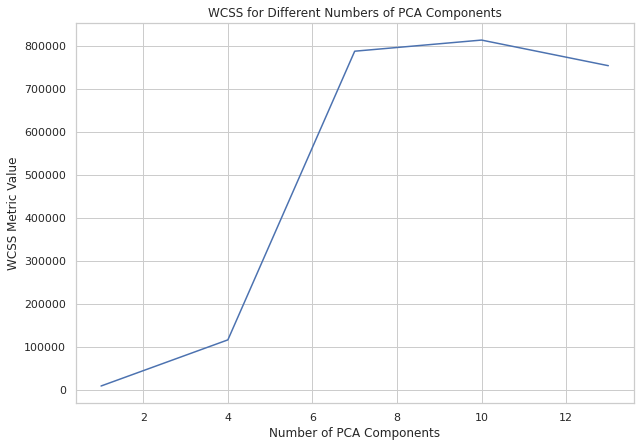

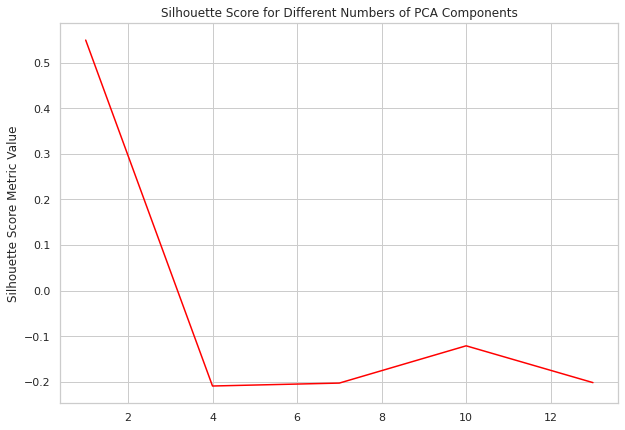

In [56]:

# Set the number of components (clusters) for GMM
n_components = 6

# Calculate WCSS and silhouette scores for different numbers of selected features
wcss = []
silhouette_scores = []
max_features = X.shape[1]
for n_features in range(1, max_pca_components + 1,3):
    # Perform feature selection with n_features
    estimator = RandomForestClassifier(n_estimators=100, random_state=0)
    rfe = RFE(estimator, n_features_to_select=n_features)
    X_rfe = rfe.fit_transform(X, Y)
    
    # Perform Expectation Maximization clustering using GMM on the reduced data
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(X_rfe)
    cluster_labels = gmm.predict(X_rfe)
    
    # Calculate WCSS for GMM
    wcss_gmm = np.sum([np.sum((X_rfe[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(n_components)])
    wcss.append(wcss_gmm)
    
    # Calculate silhouette score for GMM
    silhouette_avg = silhouette_score(X_rfe, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS and silhouette scores for different numbers of ICA components
plt.plot(range(1, max_pca_components + 1,3), wcss, label='WCSS')
plt.xlabel('Number of PCA Components')
plt.ylabel('WCSS Metric Value')
plt.title('WCSS for Different Numbers of PCA Components')
plt.show()

plt.plot(range(1, max_pca_components + 1,3), silhouette_scores, label='Silhouette Score',color='red')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.ylabel('Silhouette Score Metric Value')
plt.show()


### Feature Selection for Expectation Maximization with 2d data

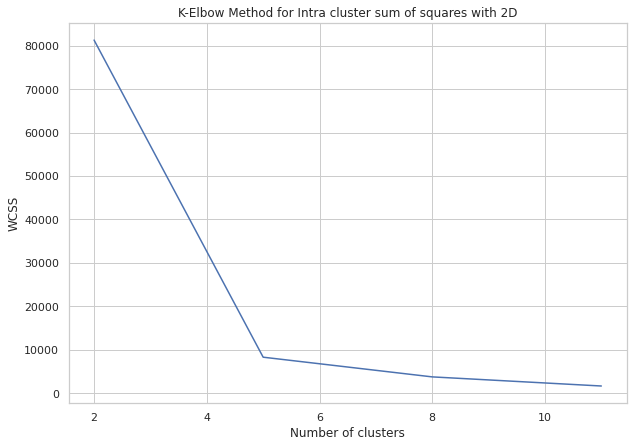

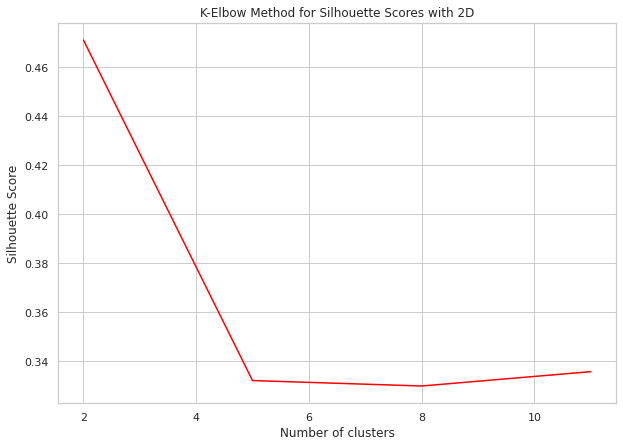

In [57]:

# Set the number of components (clusters) for GMM
n_components = 6

# Calculate WCSS and silhouette scores for different numbers of selected features
wcss = []
silhouette_scores = []
nclusters = 15
for ncluster in range(2, max_pca_components + 1,3):
    # Perform feature selection with n_features
    estimator = RandomForestClassifier(n_estimators=100, random_state=0)
    rfe = RFE(estimator, n_features_to_select=2)
    X_rfe = rfe.fit_transform(X, Y)
    
    # Perform Expectation Maximization clustering using GMM on the reduced data
    gmm = GaussianMixture(n_components=ncluster, covariance_type='full', random_state=0)
    gmm.fit(X_rfe)
    cluster_labels = gmm.predict(X_rfe)
    
    # Calculate WCSS for GMM
    wcss_gmm = np.sum([np.sum((X_rfe[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(2)])
    wcss.append(wcss_gmm)
    
    # Calculate silhouette score for GMM
    silhouette_avg = silhouette_score(X_rfe, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method graph
plt.plot(range(2, max_pca_components + 1,3), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, max_pca_components + 1,3), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

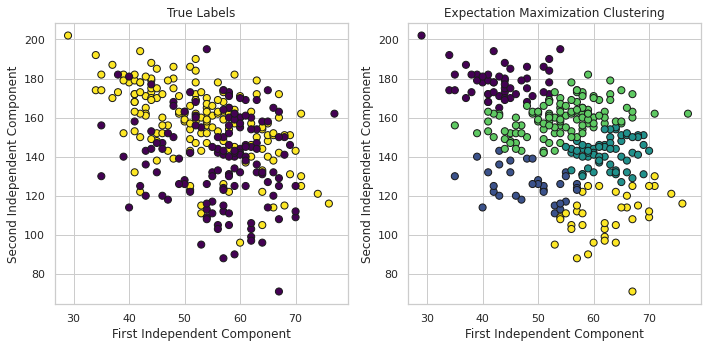

In [58]:
estimator = RandomForestClassifier(n_estimators=100, random_state=0)
rfe = RFE(estimator, n_features_to_select=2)
X_rfe = rfe.fit_transform(X, Y)
    
# Perform Expectation Maximization clustering using GMM on the ICA-transformed data
n_components = 5
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
gmm_labels = gmm.fit_predict(X_rfe)

# Visualize the ICA-transformed data and Expectation Maximization clustering results
plt.figure(figsize=(10, 5))

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X_rfe[:, 0], X_rfe[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

# Plot the Expectation Maximization clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_rfe[:, 0], X_rfe[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Expectation Maximization Clustering')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

plt.tight_layout()
plt.show()


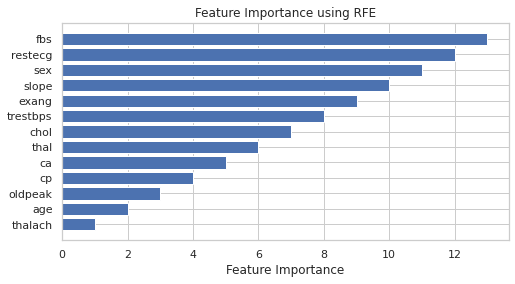

In [59]:

# Instantiate a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Apply RFE with the RandomForestClassifier to find feature importance
selector = RFE(clf, n_features_to_select=1, step=1)
selector = selector.fit(X, Y)

# Get feature importances and sort them
feature_importance = selector.ranking_
sorted_idx = np.argsort(feature_importance)

# Plot the feature importances
plt.figure(figsize=(8, 4))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), X_cols[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance using RFE')
plt.show()


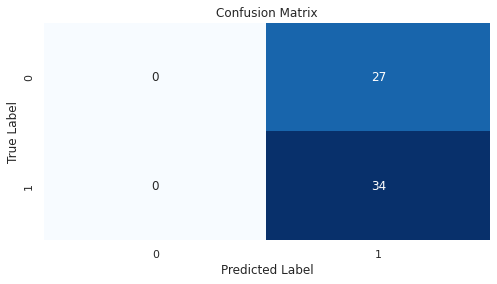

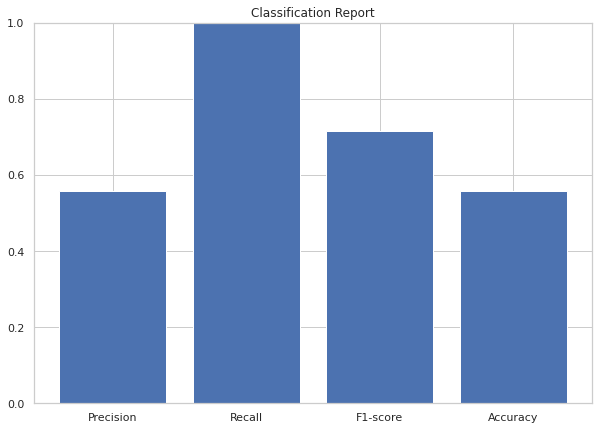

In [60]:

# Instantiate a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Apply RFE with the RandomForestClassifier to find feature importance
selector = RFE(clf, n_features_to_select=1, step=1)
selector = selector.fit(X, Y)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selector.transform(X), Y, test_size=0.2, random_state=0)

# Instantiate a simple feed-forward neural network
clf = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=0)

# Train the neural network on the training set
clf.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = clf.predict(X_test)

# Compute classification metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
metrics = [precision, recall, f1, accuracy]

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the classification report
labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
plt.bar(labels, metrics)
plt.title('Classification Report')
plt.ylim(0, 1)
plt.show()


## Neural Network with all features

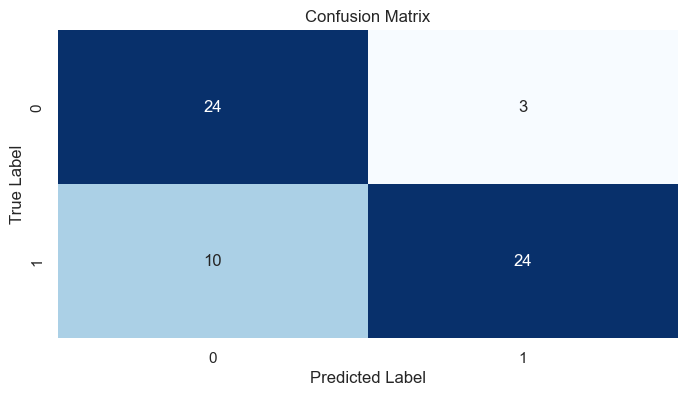

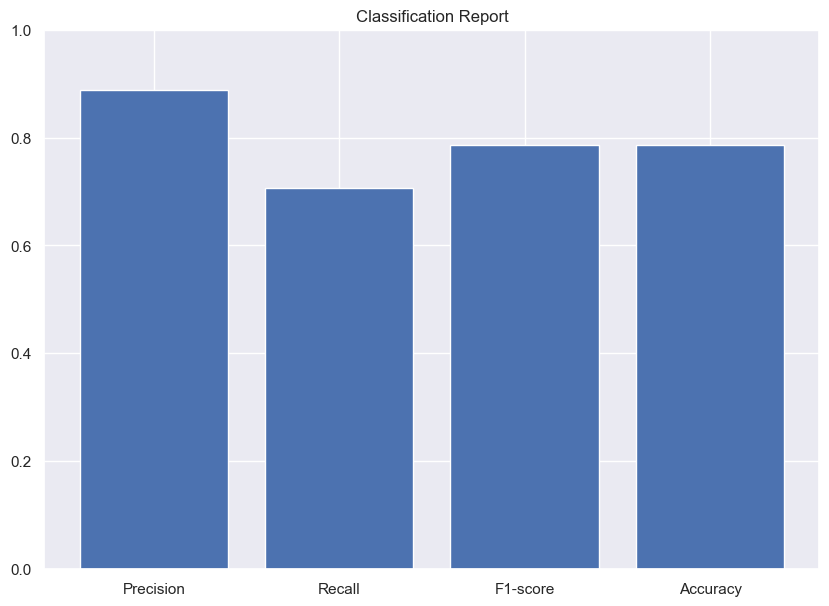

In [13]:


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Instantiate a simple feed-forward neural network
clf = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=0)

# Train the neural network on the training set
clf.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = clf.predict(X_test)

# Compute classification metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
metrics = [precision, recall, f1, accuracy]

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the classification report
labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
plt.bar(labels, metrics)
plt.title('Classification Report')
plt.ylim(0, 1)
plt.show()

